## ECON 441B HW1

### Ivy (Yacheng) Qiu

In [2]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [3]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [4]:
data.index = pd.to_datetime(data.index)

In [7]:
data.dropna(inplace = True)

In [10]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [11]:
split_1 = int(len(data)* .6)
split_2 = int(len(data)* .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [13]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [14]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out) 
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [16]:
model1 = sm.OLS(y_in, X_in).fit()

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        14:54:35   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529      0.000       1.540       5.410
Unemployment      0.5307      0.106      5.009      0.000       0.323       0.739
HousingStarts    -0.0005      0.000     -1.046      0.296      -0.001       0.000
Inflation         0.0077      0.004      2.173      0.030       0.001       0.015
==============================================================================
Omnibus:                       77.750   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.849
Skew:                           1.039   Prob(JB):                     2.11e-27
Kurtosis:                       4.413   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4.) Recreate the graph fro your model

In [17]:
import matplotlib.pyplot as plt

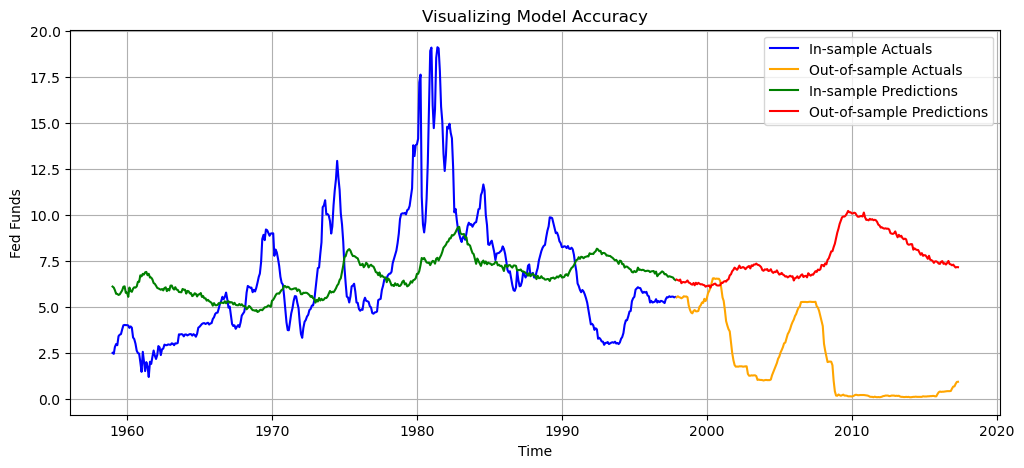

In [31]:
plt.figure(figsize = (12,5))

###

plt.plot(y_in, label='In-sample Actuals', color='blue')
plt.plot(y_out, label='Out-of-sample Actuals', color='orange')

in_pred = model1.predict(X_in)
out_pred = model1.predict(X_out)


plt.plot(in_pred, label='In-sample Predictions', color='green')
plt.plot(out_pred, label='Out-of-sample Predictions', color='red')


plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend()
plt.grid()
plt.show()

- From the plot, this model is probably underfitting

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
in_mse_1 = mean_squared_error(y_in, in_pred)
out_mse_1 = mean_squared_error(y_out, out_pred)

In [29]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835668566


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
max_degrees = 3

DEGREE:  1


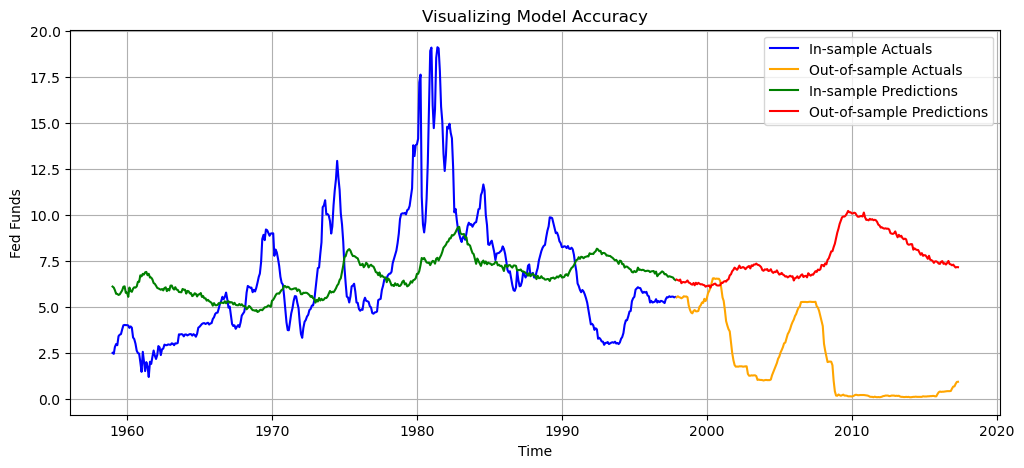

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565212
DEGREE:  2


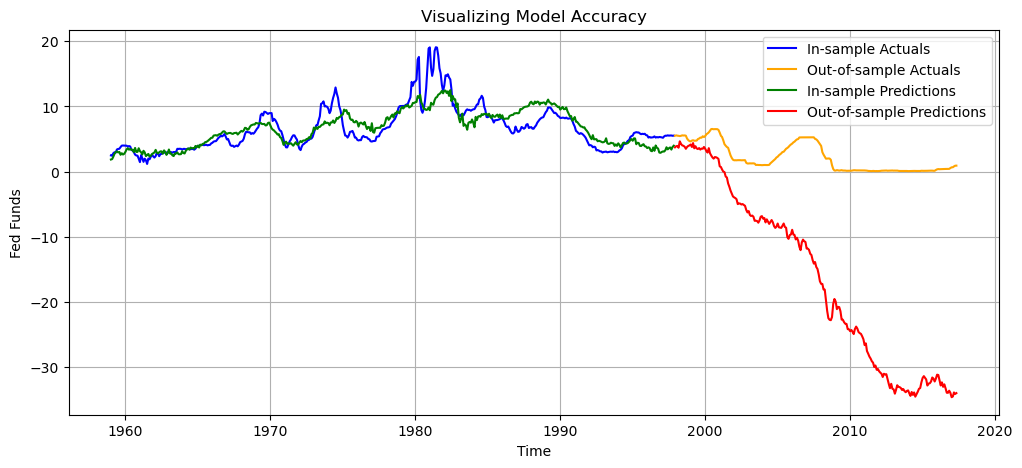

Insample MSE :  3.863477139276067
Outsample MSE :  481.4465099024015
DEGREE:  3


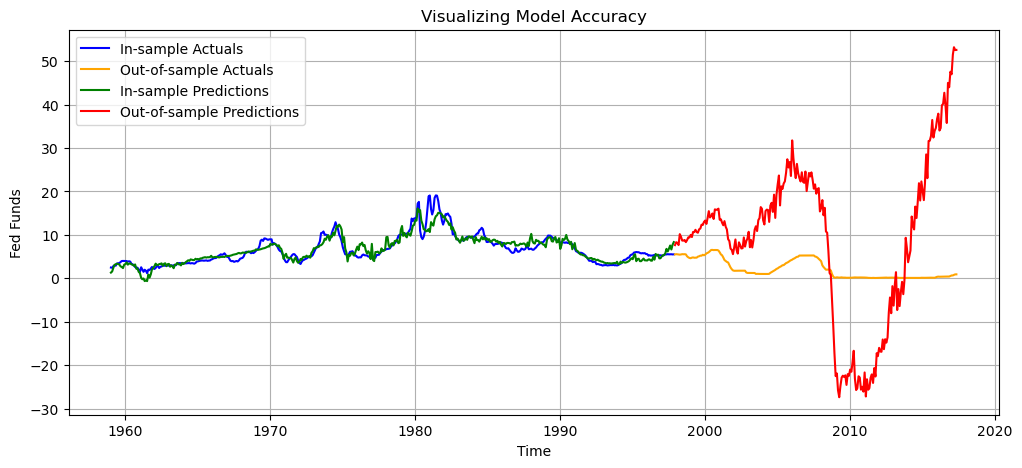

Insample MSE :  1.872363628831326
Outsample MSE :  371.7672613994206


In [52]:
for degree in range(1, max_degrees+1):
    print("DEGREE: ", degree)
    poly = PolynomialFeatures(degree = degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    #Plot
    plt.figure(figsize = (12,5))
    
    plt.plot(y_in, label='In-sample Actuals', color='blue')
    plt.plot(y_out, label='Out-of-sample Actuals', color='orange')

    in_pred = model1.predict(X_in_poly)
    out_pred = model1.predict(X_out_poly)
    
    plt.plot(y_in.index, in_pred, label='In-sample Predictions', color='green')
    plt.plot(y_out.index, out_pred, label='Out-of-sample Predictions', color='red')


    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    
    # in and out of sample MSEs
    in_mse_1 = mean_squared_error(y_in, in_pred)
    out_mse_1 = mean_squared_error(y_out, out_pred)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

As the degree of the polynomials increases, the in-sample MSE decreases, indicating a better fit to the training data. However, due to the bias-variance tradeoff, a higher degree polynomial grants the model more flexibility, which reduces bias but increases variance. Although the training MSE, or in-sample MSE, is non-increasing, meaning it does not increase as model complexity increases, the out-of-sample MSE escalates sharply with higher degrees. This severe rise in out-of-sample MSE for degrees 2 and 3 signals overfitting, where the model captures the noise rather than the underlying trend of the data.